In [1]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import colorsys
from scipy import optimize as sciopt
import os

Welcome to JupyROOT 6.18/04


In [196]:
import ROOT as r                                                                                                       
#f = r.TFile("./data/stripped_gm2skim_ana_16356.root")
#f.cd("trackerNTup")
#f.ls()
fout = r.TFile("./CaloXVsCaloYVsEnergy_decayvYCuts.root","RECREATE")
t = r.TChain("allmuons/tree")
#t.Add("./9d_5040A_gold/gm2skim_ana_16356.root")
t.Add("./data/gm2skim_ana_16381.root")
#t.Print()

#----------------------------------------------------------------------------
# Define the cuts                                                                                                      
#----------------------------------------------------------------------------

# General cuts                                                                                                         
caloTimeCut = "cluTime > 25000 && cluTime < 200000"
qualityCut = "trkPassCaloVertexQuality && trkPassTrackQuality && trkPassVertexQuality"
generalCuts  = qualityCut + " && " + caloTimeCut 

station12Cut = " trkStationNum == 12 "                                                                                 
station18Cut = " trkStationNum == 18 "

yCuts = []

for y in range(-75, 75, 30):
    yCuts.append(generalCuts + "&& decayvY > " + str(y) + " && decayvY < " + str(y + 30))

xzCuts = []

for xz in range(7000, 7210, 30):
    xzCuts.append(generalCuts + "&& TMath::Sqrt( decayvZ**2 + decayvX**2) > " + str(xz) +\
                  " && TMath::Sqrt( decayvZ**2 + decayvX**2) < " + str(xz + 30))

# The cuts for decay y momentum
decayMomYCuts = []

for momentum in range(-300, 300, 50):
    lower = momentum
    upper = momentum + 50
    
    cut = "decayMomY > " + str(lower) + " && decayMomY < " + str(upper)
    
    decayMomYCuts.append(generalCuts + " && " + cut)

print("Creating hist...")
CaloXVsCaloY_random = r.TH3I("CaloXVsCaloY","Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy; calo cluster energy [MeV]; calo cluster x [mm from center]; calo cluster y [mm from center]",
                        32,0,3200,
                        #2500,25,397.975,
                        #251,-50,50,
                        251,-120,120,
                        251,-75,75)

caloYHists = []

for i in range(0, len(yCuts)):
    caloYHist = CaloXVsCaloY_random.Clone("CaloXVsCaloY"+str(i));
    caloYHists.append(caloYHist)
    
caloXZHists = []

for i in range(0, len(xyCuts)):
    caloXZHist = CaloXVsCaloY_random.Clone("CaloXVsCaloXZ"+str(i));
    caloXZHists.append(caloXZHist)

#----------------------------------------------------------------------------
# Draw the histograms
#----------------------------------------------------------------------------

print("Drawing...")

histGrid = []

for y, yCut in enumerate(yCuts):
    for xz, xzCut in enumerate(xzCuts):
        hist = CaloXVsCaloY_random.Clone("Y" + str(y) + "XZ" + str(xz));
        print("   Y" + str(y) + "XZ" + str(xz) + "...")
        t.Draw("(cluY-3)*25.2:(cluX-4.5)*25.2:cluEne.>>Y"+ str(y) + "XZ" + str(xz),
               yCut + " && " + xzCut,
               "goff")
        histGrid.append(hist)

decayMomYHists = []
        
for index, cut in enumerate(decayMomYCuts):
    hist = CaloXVsCaloY_random.Clone("CaloXVsCaloYM" + str(index))
    print("   " + str(index) + "...")
    t.Draw("(cluY-3)*25.2:(cluX-4.5)*25.2:cluEne.>>CaloXVsCaloYM"+str(index),cut,"goff")
    decayMomYHists.append(hist)
    
for i, cut in enumerate(yCuts):
    print("   " + str(i) + "...")
    t.Draw("(cluY-3)*25.2:(cluX-4.5)*25.2:cluEne.>>CaloXVsCaloY"+str(i), cut,"goff")


print("Done. Drawing canvas....")

h3 = r.TH2D("h3", "Extrapolated Beam Positions", 100, 7020, 7220, 100, -75, 75)
t.Draw("decayvY:TMath::Sqrt( decayvZ**2 + decayvX**2)>>h3", generalCuts, "goff")

for i, cut in enumerate(xzCuts):
    print("   " + str(i) + "...")
    t.Draw("(cluY-3)*25.2:(cluX-4.5)*25.2:cluEne.>>CaloXVsCaloXZ"+str(i), cut,"goff")

    
h3.Write()
CaloXVsCaloY_random.Write()

for histogram in caloYHists:
    histogram.Write()

for histogram in caloXZHists:
    histogram.Write()

for histogram in histGrid:
    histogram.Write()
    
for histogram in decayMomYHists:
    histogram.Write()

fout.Close() 

Creating hist...
Drawing...
   Y0XZ0...
   Y0XZ1...
   Y0XZ2...
   Y0XZ3...
   Y0XZ4...
   Y0XZ5...
   Y0XZ6...
   Y1XZ0...
   Y1XZ1...
   Y1XZ2...
   Y1XZ3...
   Y1XZ4...
   Y1XZ5...
   Y1XZ6...
   Y2XZ0...
   Y2XZ1...
   Y2XZ2...
   Y2XZ3...
   Y2XZ4...
   Y2XZ5...
   Y2XZ6...
   Y3XZ0...
   Y3XZ1...
   Y3XZ2...
   Y3XZ3...
   Y3XZ4...
   Y3XZ5...
   Y3XZ6...
   Y4XZ0...
   Y4XZ1...
   Y4XZ2...
   Y4XZ3...
   Y4XZ4...
   Y4XZ5...
   Y4XZ6...
   0...
   1...
   2...
   3...
   4...
   5...
   6...
   7...
   8...
   9...
   10...
   11...
   0...
   1...
   2...
   3...
   4...
Done. Drawing canvas....
   0...
   1...
   2...
   3...
   4...
   5...
   6...


In [197]:
f = r.TFile("./CaloXVsCaloYVsEnergy_decayvYCuts.root")

In [165]:
f = r.TFile("./data/CaloXVsCaloYVsEnergy_decayvYCuts.root")

In [198]:
f.ls()

TFile**		./CaloXVsCaloYVsEnergy_decayvYCuts.root	
 TFile*		./CaloXVsCaloYVsEnergy_decayvYCuts.root	
  KEY: TH2D	h3;1	Extrapolated Beam Positions
  KEY: TH3I	CaloXVsCaloY;1	Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy
  KEY: TH3I	CaloXVsCaloY0;1	Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy
  KEY: TH3I	CaloXVsCaloY1;1	Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy
  KEY: TH3I	CaloXVsCaloY2;1	Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy
  KEY: TH3I	CaloXVsCaloY3;1	Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy
  KEY: TH3I	CaloXVsCaloY4;1	Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy
  KEY: TH3I	CaloXVsCaloXZ0;1	Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy
  KEY: TH3I	CaloXVsCaloXZ1;1	Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy
  KEY: TH3I	CaloXVsCaloXZ2;1	Y-Distribution in Calo vs. X-Distribution in Calo vs. Energy
  KEY: TH3I	CaloXVsCaloXZ3;1	Y-Distribution in Calo 

In [2]:
f = r.TFile("../run2C/newRun2C.root")

Warning in <TFile::Init>: file ../run2C/newRun2C.root probably not closed, trying to recover
Info in <TFile::Recover>: ../run2C/newRun2C.root, recovered key TDirectoryFile:verticalPosition at address 300
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: no StreamerInfo found in ../run2C/newRun2C.root therefore preventing schema evolution when reading this file. The file was produced with version 6.12/04 of ROOT.


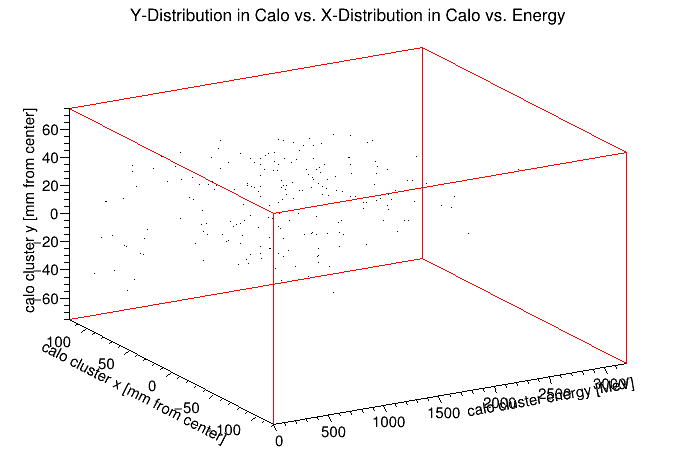

In [199]:
hist = f.Get('Y3XZ4')
c = r.TCanvas()
hist.Draw()
c.Draw()

Info in <TCanvas::Print>: png file Beam.png has been created


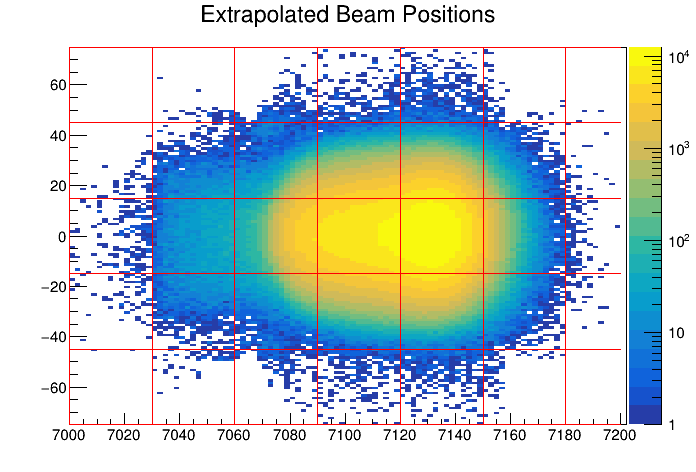

In [174]:
c = r.TCanvas()
r.gStyle.SetOptStat(0)
r.gStyle.SetLineColorAlpha(2, 1)

lines = [[],[]]
hist.SetAxisRange(7000, 7200, "x")
hist.Draw("colz")

j = 0
for i in range(7000, 7200, 30):
    l = r.TLine(i, -75, i, 75)
    lines[0].append(l)
    lines[0][j].Draw("SAME")
    j += 1

j = 0
for i in range(-75, 76, 30):
    l = r.TLine(7000, i, 7200, i)
    lines[1].append(l)
    lines[1][j].Draw("SAME")
    j += 1

c.SetLogz()
c.Draw()
c.SaveAs("Beam.png")

In [40]:
yHists = []
rHists = []
f = r.TFile("./data/CaloXVsCaloYVsEnergy_decayvYCuts.root")

energy_range = [1000, 2400]

for i in range(1, 7):
    
    h = f.Get('CaloXVsCaloY' + str(i)).Clone()
    
    #h.SetAxisRange(energy_range[0], energy_range[1], "x")
    yHists.append(h.Project3D("zy"))
    
for j in range(1, 9):
    
    h = f.Get('CaloXVsCaloYR' + str(j)).Clone()
    
    rHists.append(h.Project3D("zy"))

In [161]:
histList = []
energy_range = [0, 3200]

for e in range(0, 3201, 100):

    for y in range(1, 7):
        for zx in range(1, 9):
            hist = f.Get('Y' + str(y) + 'R' + str(zx)).Clone()
            hist.SetAxisRange(0, e, "x")
            histList.append(hist.Project3D("zy"))

    c = r.TCanvas("c", "c", 1200, 896)
    c.Divide(8, 6)

    for i, hist in enumerate(histList):
        c.cd(i+1)
        r.gPad.SetLogz()
        hist.Draw("colz")
    #title = r.TPaveLabel(.11, .95, .35, .99, str(e), "brndc")
    #title.Draw()
    c.SaveAs("./gif1/" + str(e) + ".png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./gif1/0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./gif1/100.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./gif1/200.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./gif1/300.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./gif1/400.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./gif1/500.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./gif1/600.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


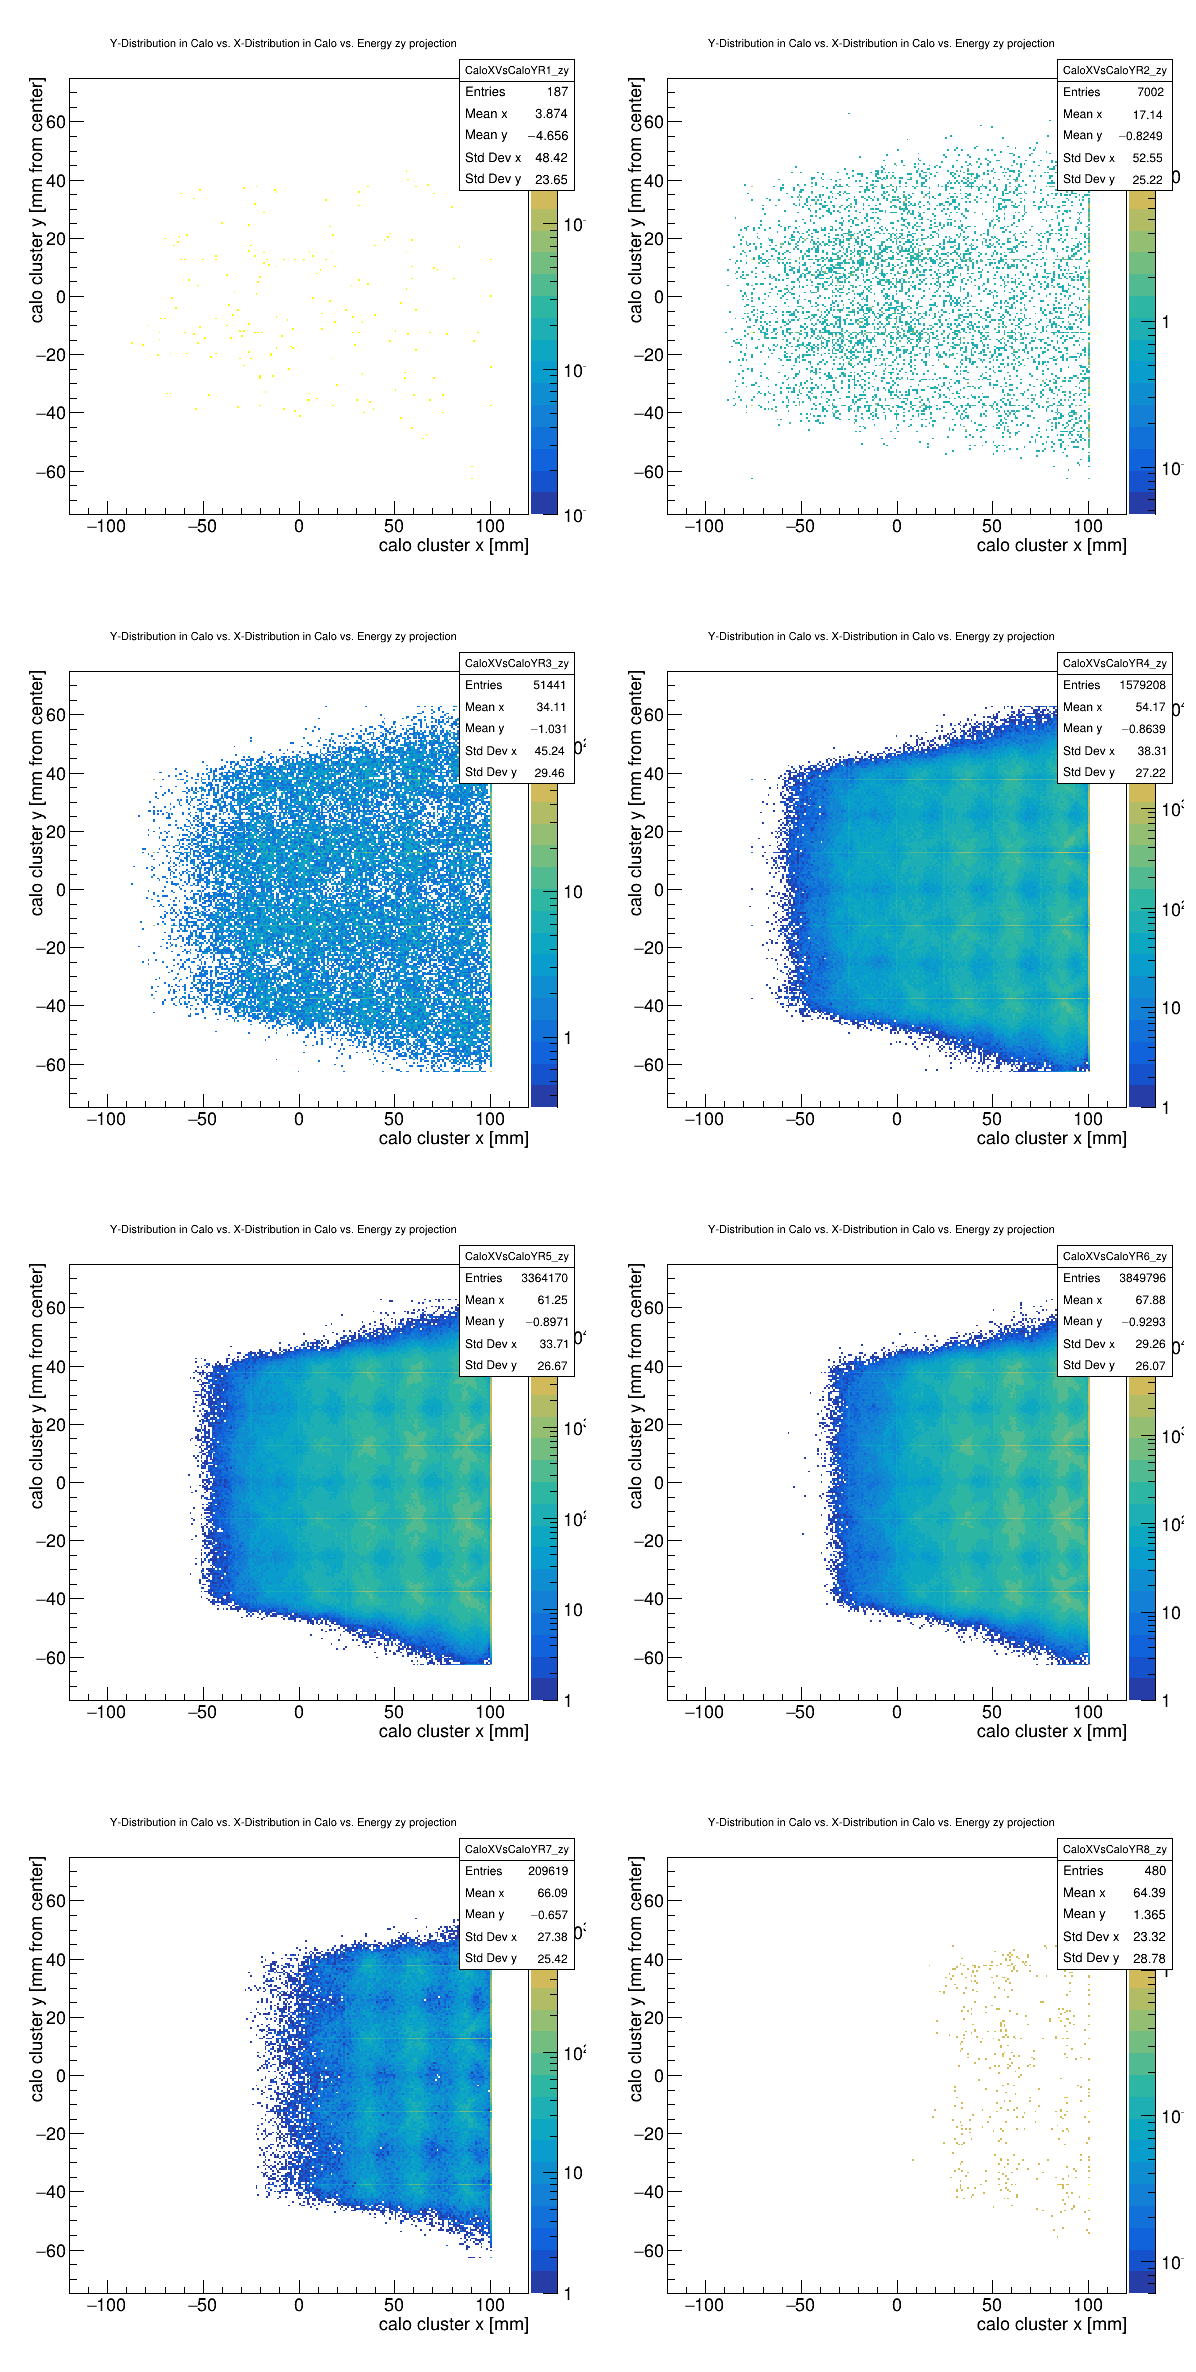

In [42]:
c = r.TCanvas("c", "c", 1200, 2400)
c.Divide(2, 4)

for i, hist in enumerate(rHists):
    c.cd(i+1)
    hist.Draw("colz")
    r.gPad.SetLogz()
c.Draw()